In [1]:
#importing all the necessary liabirary
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing files
df = pd.read_csv("ailerons_train.csv")
df.head()

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se,goal
0,2,-56,-0.33,-0.09,0.90,0.2,-11,12,0.004,-0.1,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.032,-0.0009
1,470,-39,0.02,0.12,0.39,-0.6,-12,8,0.009,-1.6,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.034,-0.0011
2,165,4,0.14,0.14,0.78,0.4,-11,-9,-0.003,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.034,-0.0012
3,-113,5,-0.12,0.11,1.06,0.6,-10,-7,-0.008,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.033,-0.0011
4,-411,-21,-0.17,0.07,1.33,-0.6,-11,0,0.002,0.1,...,0.0,0.0,0.0,0.0,0.0,-0.002,0.0,0.9,0.032,-0.0008


In [3]:
#chicking the number of rows and columns
df.shape

(12250, 41)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   climbRate     12250 non-null  int64  
 1   Sgz           12250 non-null  int64  
 2   p             12250 non-null  float64
 3   q             12250 non-null  float64
 4   curPitch      12250 non-null  float64
 5   curRoll       12250 non-null  float64
 6   absRoll       12250 non-null  int64  
 7   diffClb       12250 non-null  int64  
 8   diffRollRate  12250 non-null  float64
 9   diffDiffClb   12250 non-null  float64
 10  SeTime1       12250 non-null  float64
 11  SeTime2       12250 non-null  float64
 12  SeTime3       12250 non-null  float64
 13  SeTime4       12250 non-null  float64
 14  SeTime5       12250 non-null  float64
 15  SeTime6       12250 non-null  float64
 16  SeTime7       12250 non-null  float64
 17  SeTime8       12250 non-null  float64
 18  SeTime9       12250 non-nu

In [5]:
df.describe()

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se,goal
count,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,12250.000000,...,12250.000000,12250.000000,1.225000e+04,12250.000000,1.225000e+04,12250.000000,1.225000e+04,12250.000000,12250.000000,12250.000000
mean,-9.362939,-12.632408,0.006878,0.061144,0.626213,0.067045,-11.068816,-0.919592,-0.000970,-0.053698,...,0.000000,-0.000103,-5.714286e-07,-0.000100,-6.530612e-07,-0.000096,-3.265306e-07,0.622106,0.021949,-0.000871
std,259.502687,25.727234,0.305488,0.118447,0.312061,0.969050,4.094653,10.405533,0.013352,1.121631,...,0.000013,0.000621,8.806480e-05,0.000644,5.569441e-05,0.000617,3.129801e-05,0.195486,0.006912,0.000404
min,-975.000000,-99.000000,-1.530000,-0.540000,-0.420000,-3.100000,-23.000000,-43.000000,-0.099000,-8.800000,...,-0.001000,-0.006000,-6.000000e-03,-0.006000,-4.000000e-03,-0.006000,-3.000000e-03,0.400000,0.012000,-0.003600
25%,-176.000000,-29.000000,-0.220000,-0.020000,0.420000,-0.600000,-14.000000,-8.000000,-0.009000,-0.300000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.500000,0.018000,-0.001100
50%,-20.000000,-13.000000,0.020000,0.060000,0.610000,0.200000,-11.000000,-1.000000,-0.001000,-0.100000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.600000,0.020000,-0.000800
75%,159.000000,3.000000,0.230000,0.130000,0.800000,0.700000,-8.000000,6.000000,0.008000,0.200000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.700000,0.023000,-0.000600
max,977.000000,94.000000,1.060000,0.620000,2.580000,2.900000,-3.000000,46.000000,0.056000,11.200000,...,0.001000,0.003000,6.000000e-03,0.005000,2.000000e-03,0.007000,1.000000e-03,2.000000,0.073000,-0.000200


In [6]:
#checking if there's any duplicate
df.duplicated().sum()

0

In [7]:
#checking if there's any null values
df.isnull().sum()

climbRate       0
Sgz             0
p               0
q               0
curPitch        0
curRoll         0
absRoll         0
diffClb         0
diffRollRate    0
diffDiffClb     0
SeTime1         0
SeTime2         0
SeTime3         0
SeTime4         0
SeTime5         0
SeTime6         0
SeTime7         0
SeTime8         0
SeTime9         0
SeTime10        0
SeTime11        0
SeTime12        0
SeTime13        0
SeTime14        0
diffSeTime1     0
diffSeTime2     0
diffSeTime3     0
diffSeTime4     0
diffSeTime5     0
diffSeTime6     0
diffSeTime7     0
diffSeTime8     0
diffSeTime9     0
diffSeTime10    0
diffSeTime11    0
diffSeTime12    0
diffSeTime13    0
diffSeTime14    0
alpha           0
Se              0
goal            0
dtype: int64

<AxesSubplot:>

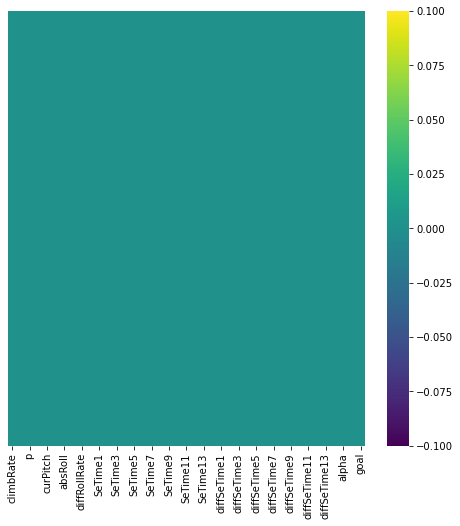

In [8]:
#vizualizing data to know if there's any null value
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

<function matplotlib.pyplot.show(close=None, block=None)>

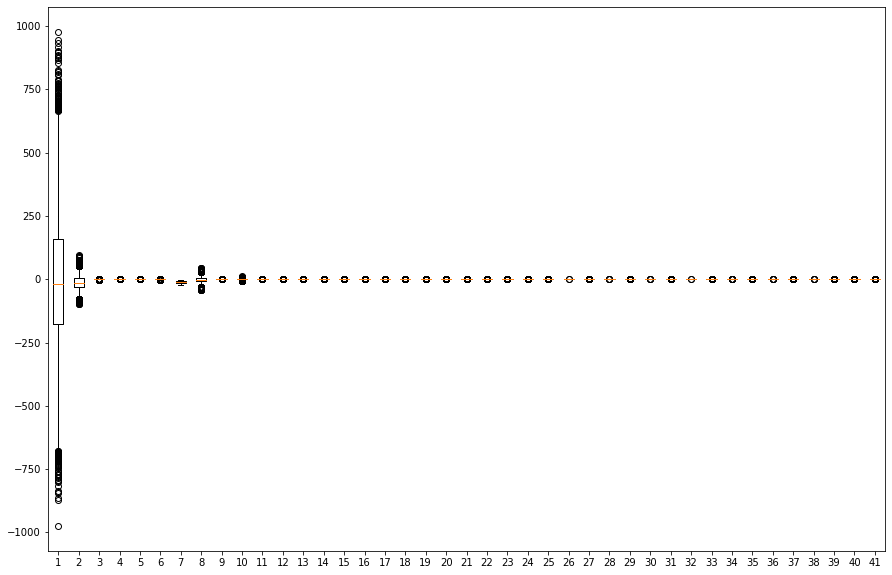

In [9]:
#plotting boxplot to detect the outliers
plt.figure(figsize=(15,10))
plt.boxplot(df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

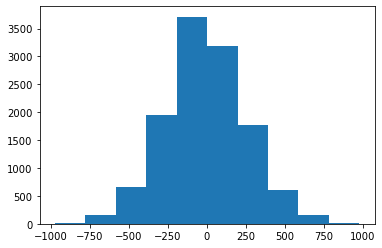

In [10]:
#histogram to understand the skewness
plt.hist(df["climbRate"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

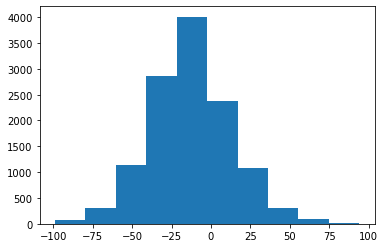

In [11]:
plt.hist(df["Sgz"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

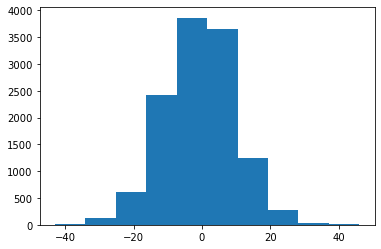

In [12]:
plt.hist(df["diffClb"])
plt.show

In [13]:
#slicing 
X = df.drop("goal",axis=1)
y = df["goal"]

In [14]:
#trainging the model 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)


In [15]:
#ckecking the corr
X_train.corr()

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime7,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha,Se
climbRate,1.000000,-0.000001,0.160733,0.090026,-0.790302,-0.135246,-0.033501,0.078082,0.164214,-0.329497,...,2.201874e-01,6.910687e-03,2.488777e-01,0.022375,2.780063e-01,1.571221e-02,2.716414e-01,-1.008353e-03,-0.017072,-0.005670
Sgz,-0.000001,1.000000,0.066284,0.341807,-0.007693,-0.006879,0.088421,-0.448429,-0.050528,-0.018270,...,-1.354524e-03,5.299228e-03,1.320212e-02,-0.004034,5.251950e-03,-3.035196e-03,2.146971e-02,8.287258e-03,-0.015703,0.004436
p,0.160733,0.066284,1.000000,0.113603,-0.121601,-0.045446,-0.020495,-0.085067,0.151034,-0.115470,...,1.130968e-01,9.800094e-03,1.038127e-01,0.025927,9.125068e-02,1.302639e-02,1.141540e-01,3.167540e-03,0.000410,0.009089
q,0.090026,0.341807,0.113603,1.000000,0.147897,0.030145,-0.383192,-0.773685,-0.196427,-0.434487,...,-1.422158e-01,-2.121362e-02,-1.566455e-01,-0.015138,-1.515832e-01,-2.879571e-02,-7.531023e-02,2.492651e-03,0.351295,0.411395
curPitch,-0.790302,-0.007693,-0.121601,0.147897,1.000000,0.088118,-0.166729,-0.193572,-0.147191,0.236422,...,-2.101395e-01,-1.525921e-02,-2.388526e-01,-0.045109,-2.645249e-01,-1.665927e-02,-2.476668e-01,-9.368527e-03,0.615553,0.610684
curRoll,-0.135246,-0.006879,-0.045446,0.030145,0.088118,1.000000,0.215642,-0.155193,-0.673156,0.032122,...,-5.014545e-02,-3.521569e-03,-5.411551e-02,-0.006397,-2.562671e-02,-1.222901e-04,-3.130308e-02,-8.329124e-04,-0.025056,-0.026442
absRoll,-0.033501,0.088421,-0.020495,-0.383192,-0.166729,0.215642,1.000000,-0.042570,-0.175787,0.000992,...,1.015294e-02,1.466068e-02,1.744574e-02,0.012738,1.945212e-02,1.617964e-02,3.185281e-02,7.041554e-03,-0.326552,-0.346381
diffClb,0.078082,-0.448429,-0.085067,-0.773685,-0.193572,-0.155193,-0.042570,1.000000,0.327762,0.042406,...,1.875922e-01,1.654587e-02,2.028257e-01,0.011043,2.128896e-01,2.422280e-02,1.692904e-01,-7.213629e-03,-0.213956,-0.242588
diffRollRate,0.164214,-0.050528,0.151034,-0.196427,-0.147191,-0.673156,-0.175787,0.327762,1.000000,-0.000782,...,1.320574e-01,1.363041e-02,1.322933e-01,-0.001730,1.061570e-01,1.611663e-02,7.791283e-02,4.827713e-03,-0.031574,-0.040938
diffDiffClb,-0.329497,-0.018270,-0.115470,-0.434487,0.236422,0.032122,0.000992,0.042406,-0.000782,1.000000,...,-3.499439e-02,4.331694e-04,-5.134436e-02,-0.009322,-5.675269e-02,-1.355938e-03,-1.203732e-01,-4.422070e-03,-0.011672,-0.048763


<function matplotlib.pyplot.show(close=None, block=None)>

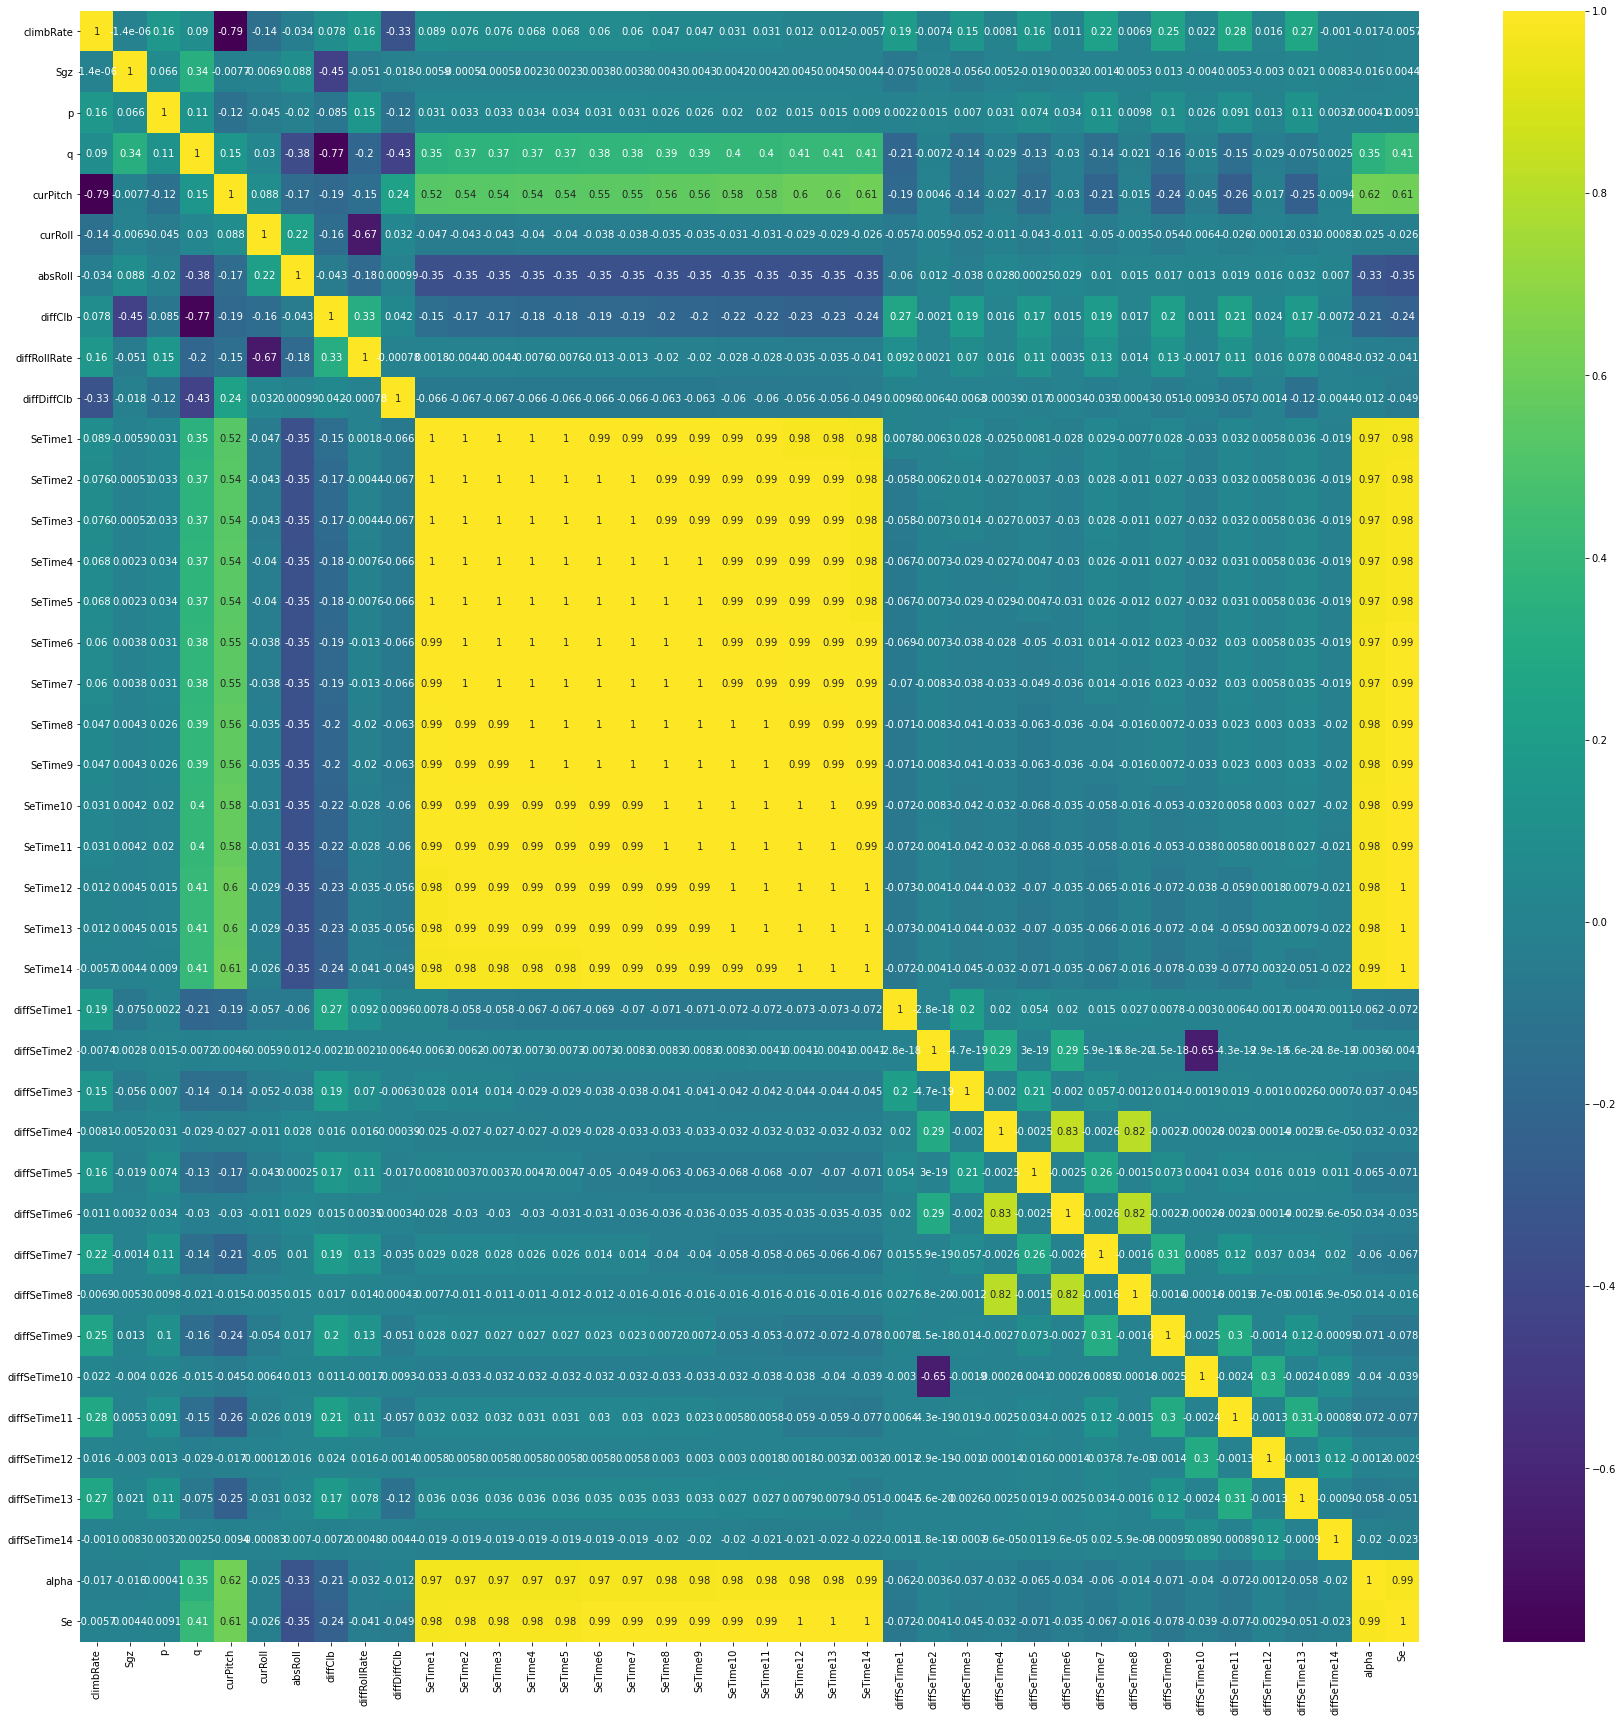

In [16]:
#useing heatmap to do the feature selection and doing after train the
corr = X_train.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr,annot= True,cmap="viridis")
plt.show

In [17]:
#creating function to get the threshold vlaue which is greater than 85%
def correlation(data,threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return colname

In [18]:
corr_feat  = correlation(X_train,0.85)
len(set(corr_feat))

2

In [19]:
corr_feat

'Se'

In [20]:
#dropping the highly correlated feature
X_train.drop('Se',axis=1,inplace=True)
X_test.drop('Se',axis=1,inplace=True)

C:\Users\ANIKET\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
X_train.head()

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime6,diffSeTime7,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha
3298,-121,-54,0.60,0.05,0.65,0.4,-11,-6,-0.003,0.2,...,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.6
2830,-163,-14,0.09,0.11,0.72,-2.0,-8,-11,0.007,0.0,...,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.6
10298,-101,28,0.25,0.30,0.76,-0.1,-15,-19,-0.012,-0.9,...,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.7
11660,-21,-42,0.08,0.13,0.57,-1.2,-13,-8,0.013,0.1,...,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.6
6687,-286,-22,-0.60,0.08,0.86,0.6,-15,-24,-0.036,1.8,...,0.0,-0.002,0.0,-0.001,0.0,0.0,0.0,-0.003,0.0,0.6


I've not done the scaleing and makesure about oultiers beacause tree based algorythm are robust scaling and outliers

In [22]:
X_test.head()

,climbRate,Sgz,p,q,curPitch,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,...,diffSeTime6,diffSeTime7,diffSeTime8,diffSeTime9,diffSeTime10,diffSeTime11,diffSeTime12,diffSeTime13,diffSeTime14,alpha
4622,-40,-28,0.53,0.20,1.47,-0.9,-14,-5,-0.007,-0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.4
9358,56,-40,0.66,0.04,0.49,-0.7,-8,-6,0.000,-0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.5
12008,59,1,-0.45,0.16,0.51,-1.2,-16,-9,0.012,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001,0.0,0.6
10875,-326,-14,-0.55,0.04,0.83,0.3,-13,-6,-0.028,0.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.5
3496,-309,33,0.11,0.21,0.89,0.5,-19,-7,0.002,-0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.002,0.0,0.6


In [23]:
#importing algorythms
from sklearn.linear_model import LinearRegression
lr =  LinearRegression()

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

from sklearn.linear_model import Ridge
rr =  Ridge()

from sklearn.linear_model import Lasso
lasso_r =  Lasso()

In [24]:
#cross valditation to get the optimal algorythm
from sklearn.model_selection import cross_val_score
print("LinearRegression" , cross_val_score(lr,X,y).mean())

print("DecisionTreeRegressor" , cross_val_score(dtr,X,y).mean())

print("RandomForestRegressor" , cross_val_score(rfr,X,y).mean())

print("Ridge" , cross_val_score(rr,X,y).mean())

print("Lasso" , cross_val_score(lasso_r,X,y).mean())

LinearRegression 0.807979432335302
DecisionTreeRegressor 0.6510089128027194
RandomForestRegressor 0.8183458018616019
Ridge 0.8048869075494608
Lasso -0.014442224141530824


In [25]:
n_estimators = [int(i)  for i in np.linspace(10,100,10)]
max_depth = [2,4]
max_features = ['auto','sqrt']
min_samples_split = [3,5]
min_samples_leaf = [2,4]
bootstrap = [True,False]

In [26]:
param_grid = {'n_estimators' : n_estimators,
              'max_depth' : max_depth ,
              'max_features' : max_features,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf ,
              'bootstrap' : bootstrap }

In [27]:
rfr = RandomForestRegressor()

In [28]:
#Hyperparmater tuning to get the optimal paramater
from sklearn.model_selection import GridSearchCV
rfrgs = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=4, verbose=2)

In [29]:
#fitting model on train data
rfrgs.fit(X_train,y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=2)

In [30]:
#checking the best paramater
rfrgs.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 80}

In [42]:
#checking the accuracy score
rfrgs.score(X_test,y_test)

0.7163317627958796

In [43]:
y_pred = rfrgs.predict(X_test)
y_pred

array([-0.00230777, -0.00061274, -0.00086285, ..., -0.00089741,
       -0.00061441, -0.00074094])

In [46]:
y_test

4622    -0.0018
9358    -0.0007
12008   -0.0009
10875   -0.0005
3496    -0.0015
          ...  
8275    -0.0006
1562    -0.0017
11511   -0.0008
5024    -0.0007
2784    -0.0007
Name: goal, Length: 2450, dtype: float64

In [48]:
#importing mean squared error
from sklearn.metrics import mean_squared_error 

In [49]:
#using loss function to check the model
mse =  mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print("MSE",mse)
print("RMSE",rmse)

MSE 4.5996656507725393e-08
RMSE 0.00021446831119707497
